#Assigment Python 2

Nama         : Clarissa Sanindita Reikisyifa

Kode Peserta : PYTN-KS17-03

## Load Data & Dependancy

In [80]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
df = pd.read_csv('/content/drive/MyDrive/dataset/nyc-rolling-sales.csv')

In [83]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

## Preprosesing Data

In [85]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [86]:
df.duplicated().sum()

0

In [87]:
df['SALE PRICE']=df['SALE PRICE'].replace(' -  ', '0').astype(float)

In [88]:
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].replace(' -  ', '0').astype(float)

##Measure of Central Tendency: Mean

In [89]:
df['SALE PRICE'].unique()

array([ 6625000.,        0.,  3936272., ...,   408092., 11693337.,
          69300.])

In [90]:
mean_sale_price = df['SALE PRICE'].astype(float).mean()
print(f"Mean Sale Price: {mean_sale_price}")

Mean Sale Price: 1056622.9941453375


##Measure of Central Tendency: Median

In [91]:
median_sale_price = df['SALE PRICE'].astype(float).median()
print(f"Median Sale Price: {median_sale_price}")

Median Sale Price: 415000.0


##Measure of Central Tendency: Modus

In [92]:
modus_sale_price = df['SALE PRICE'].astype(float).mode()[0]
print(f"Modus Sale Price: {modus_sale_price}")

Modus Sale Price: 0.0


##Measure of Spread: Range

In [93]:
range_sale_price = df['SALE PRICE'].astype(float).max() - df['SALE PRICE'].astype(float).min()
print(f"Range Sale Price: {range_sale_price}")

Range Sale Price: 2210000000.0


##Measure of Spread: Variance

In [94]:
variance_sale_price = df['SALE PRICE'].astype(float).var()
print(f"Variance Sale Price: {variance_sale_price}")

Variance Sale Price: 107909296048288.34


##Measure of Spread: Standard Deviation

In [95]:
std_dev_sale_price = df['SALE PRICE'].astype(float).std()
print(f"Standard Deviation Sale Price: {std_dev_sale_price}")

Standard Deviation Sale Price: 10387939.93283983


##Probability Distribution

In [96]:
mean = mean_sale_price
std_dev = std_dev_sale_price
probability_distribution = stats.norm(mean, std_dev)

In [97]:
values = [mean_sale_price, median_sale_price, modus_sale_price]
pdf_values = [probability_distribution.pdf(x) for x in values]

for val, pdf_val in zip(values, pdf_values):
    print(f"Probability Density Function value for sale price {val} is: {pdf_val}")


Probability Density Function value for sale price 1056622.9941453375 is: 3.840436919934816e-08
Probability Density Function value for sale price 415000.0 is: 3.8331181605125654e-08
Probability Density Function value for sale price 0.0 is: 3.820621236526571e-08


In [98]:
sale_prices = df['SALE PRICE']

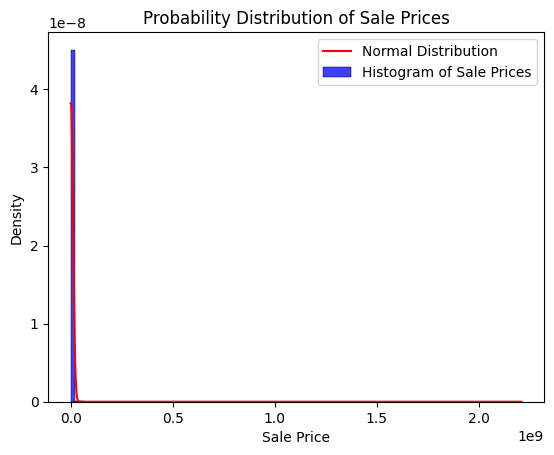

In [99]:
sns.histplot(sale_prices, bins=100, kde=False, color='blue', label='Histogram of Sale Prices', stat='density')

x = np.linspace(min(sale_prices), max(sale_prices), 1000)
y = probability_distribution.pdf(x)
plt.plot(x, y, 'r-', label='Normal Distribution')

plt.title('Probability Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.legend()
plt.show()

##Confidence Intervals

In [100]:
mean_gsf = df['GROSS SQUARE FEET'].astype(float).mean()
std_dev_gsf = df['GROSS SQUARE FEET'].astype(float).std()

confidence_interval_gsf = stats.norm.interval(0.95, loc=mean_gsf, scale=std_dev_gsf/np.sqrt(len(df)))
print(f"95% Confidence Interval for Gross Square Feet: {confidence_interval_gsf}")


95% Confidence Interval for Gross Square Feet: (2530.2441678629034, 2918.6464268288696)


##Hypothesis Testing

Hipotesis:

H0 (Hipotesis Nol): Rata-rata harga jual properti di NYC adalah $1,000,000.

H1 (Hipotesis Alternatif): Rata-rata harga jual properti di NYC bukan $1,000,000.

In [102]:
kolom_sale_price = df['SALE PRICE']
rata_rata_price = 1000000
t_stat, p_value = stats.ttest_1samp(kolom_sale_price, rata_rata_price)
if p_value < 0.05:
    print("Hipotesis Alternatif diterima: Rata-rata harga jual bukan $1.000.000.")
else:
    print("Hipotesis Nol diterima: Tidak cukup bukti bahwa rata-rata harga jual bukan $1.000.000.")


Hipotesis Nol diterima: Tidak cukup bukti bahwa rata-rata harga jual bukan $1.000.000.
